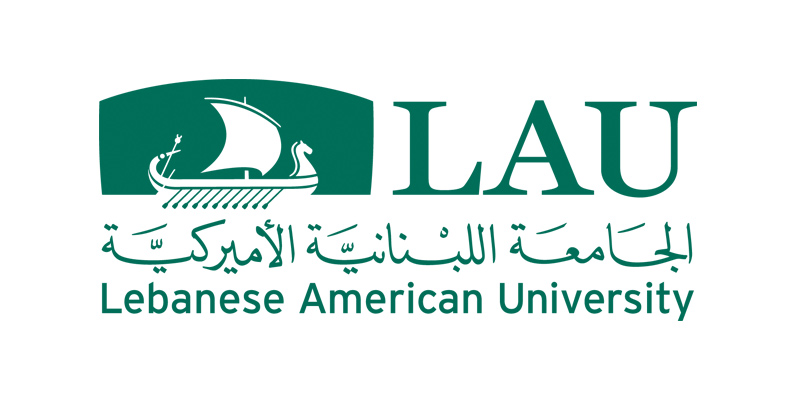

#  CSC498 Natural Language Processing  - Assignment 4
## Dr. Pauline Mouawad

##                 EMOVIE

## Prepared By 
## Moussa Zoghaib - 201701804 
## Slaiby AlMallah - 201703726
## Ralph Abou Haidar - 201800624

# Module #1: Load and Preprocess text data.

In [5]:
import pandas as pd
import numpy as np
import csv
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from bs4 import BeautifulSoup
import nltk
import string,re
from nltk.corpus import stopwords



#### clean html tags from reviews with BeautifulSoup

In [6]:
df = pd.read_csv('movie_reviews.csv')
def cleanHtml(df):
    df = df[['review','sentiment','genre','title']]
    
    df["review"] = df["review"].apply(lambda x: BeautifulSoup(x).get_text())
    return df
    
df = cleanHtml(df)
df.head()

,review,sentiment,genre,title
0,One of the other reviewers has mentioned that ...,positive,Romance,Miss Jerry
1,A wonderful little production. The filming tec...,positive,"Biography, Crime, Drama",The Story of the Kelly Gang
2,I thought this was a wonderful way to spend ti...,positive,Drama,Den sorte drøm
3,Basically there's a family where a little boy ...,negative,"Drama, History",Cleopatra
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Adventure, Drama, Fantasy",L'Inferno


#### a-b-c) Tokenize + remove punctuation,stopwords,non-alphanumeric characters + Lower case the entire text.

In [7]:
def remove_non_alpha_punc(s):
    return re.sub('[^A-Za-z0-9\s]', '', s)
    

def tokenized_lower_df(df):
    df["tokenized"] = df["review"].apply(lambda x: nltk.word_tokenize(x.lower()))
    return df

def remove_stop_words(tokens):
    stop_words = set(stopwords.words('english')) 

    new_sent = []

    for w in tokens: 
        if w not in stop_words: 
            new_sent.append(w) 
            
    return new_sent

df["review"] = df["review"].apply(lambda x: remove_non_alpha_punc(x))
df = tokenized_lower_df(df)
df["tokenized"] = df["tokenized"].apply(lambda x: remove_stop_words(x))
df.head()

,review,sentiment,genre,title,tokenized
0,One of the other reviewers has mentioned that ...,positive,Romance,Miss Jerry,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production The filming tech...,positive,"Biography, Crime, Drama",The Story of the Kelly Gang,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,positive,Drama,Den sorte drøm,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically theres a family where a little boy J...,negative,"Drama, History",Cleopatra,"[basically, theres, family, little, boy, jake,..."
4,Petter Matteis Love in the Time of Money is a ...,positive,"Adventure, Drama, Fantasy",L'Inferno,"[petter, matteis, love, time, money, visually,..."


# Module #2: Classifying